## Logistic Regression in single Variable - sklearn

__Importing csv__

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


__Plotting the csv__

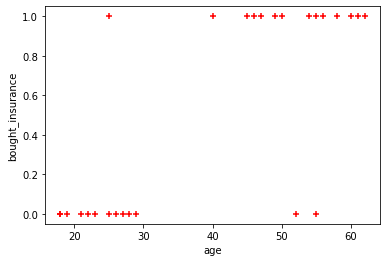

In [3]:
plt.xlabel('age')
plt.ylabel('bought_insurance')
plt.scatter(df.age,df.bought_insurance,marker = '+',color='red')

In [4]:
df.shape

(27, 2)

__Splitting the training and testing samples__

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,test_size= 0.1)

In [7]:
type(X_train)

pandas.core.frame.DataFrame

In [8]:
type(X_test)

pandas.core.frame.DataFrame

In [9]:
type(y_train)

pandas.core.series.Series

In [10]:
type(y_test)

pandas.core.series.Series

__predicting using logistic regression__

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression() # creating object from class

In [13]:
model.fit(X_train,y_train)

LogisticRegression()

In [14]:
model.coef_

array([[0.12650015]])

In [15]:
model.intercept_

array([-5.07115244])

In [16]:
X_test

,age
5,56
7,60
23,45


In [17]:
model.predict(X_test) #predicting values on test sample

array([1, 1, 1], dtype=int64)

In [18]:
model.predict_proba(X_test) 
#probablity [% of not happening, % of happening] => add both total is 1
# [[prob of 0, prob of 1]]

array([[0.11785973, 0.88214027],
       [0.0745468 , 0.9254532 ],
       [0.34947351, 0.65052649]])

In [19]:
model.predict_proba(df[['age']]) #predicting the X_train

array([[0.90789079, 0.09210921],
       [0.87086726, 0.12913274],
       [0.29434902, 0.70565098],
       [0.18140531, 0.81859469],
       [0.321289  , 0.678711  ],
       [0.11785973, 0.88214027],
       [0.13166054, 0.86833946],
       [0.0745468 , 0.9254532 ],
       [0.05886407, 0.94113593],
       [0.06627578, 0.93372422],
       [0.94235887, 0.05764113],
       [0.82188166, 0.17811834],
       [0.83965299, 0.16034701],
       [0.80260377, 0.19739623],
       [0.24464958, 0.75535042],
       [0.13166054, 0.86833946],
       [0.87086726, 0.12913274],
       [0.09399049, 0.90600951],
       [0.93509052, 0.06490948],
       [0.94235887, 0.05764113],
       [0.91793759, 0.08206241],
       [0.85596197, 0.14403803],
       [0.50278659, 0.49721341],
       [0.34947351, 0.65052649],
       [0.22203353, 0.77796647],
       [0.14680843, 0.85319157],
       [0.89675233, 0.10324767]])

In [21]:
model.score(X_test,y_test) # evaluating the score. How score function works is shown in the previous file 04

1.0

__Predicting the entire dataframe without splitting and comparing side to side__

In [22]:
predict_all = model.predict(df[['age']]) # predict function accepts 2d array or dataframe
predict_all

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0], dtype=int64)

In [23]:
df['predicted']= predict_all #adding predicted column to dataframe

In [24]:
df

,age,bought_insurance,predicted
0,22,0,0
1,25,0,0
2,47,1,1
3,52,0,1
4,46,1,1
5,56,1,1
6,55,0,1
7,60,1,1
8,62,1,1
9,61,1,1


In [25]:
df.bought_insurance.value_counts() #This is not a correct way to evaluate. Instead use confusion matrix

1    14
0    13
Name: bought_insurance, dtype: int64

In [26]:
df.predicted.value_counts()

1    14
0    13
Name: predicted, dtype: int64